In [28]:
from __future__ import unicode_literals

import lal
import lalsimulation
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [29]:
style = "times"

if style=="times":
    plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')
else:
    plt.style.use('/home/hosilva/tools/mplstyle/computermodernstyle.mplstyle')

## Basic setup

Define parameters of a GW150914-like event

In [4]:
# Define the binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary

m1 = 31.0*lal.MSUN_SI
m2 = 39.0*lal.MSUN_SI

phi_c = 0.
f_start22 = 10. #Frequency of the 22 mode at which the signal starts
distance = 500e6*lal.PC_SI

z = 0.01

spin1_z = 0.
spin2_z =  0.

inclination = 153.95
deltaT = 1./4096.

# Only GR for now
domega220, dtau220 = 0., 0.
domega210, dtau210 = 0., 0.
domega330, dtau330 = 0., 0.
domega440, dtau440 = 0., 0.
domega550, dtau550 = 0., 0.
alphaNGR = 0.
pNGR = 0.

In [9]:
paramdict = lal.CreateDict()

lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)
lalsimulation.SimInspiralWaveformParamsInsertAlphaNGR(paramdict, alphaNGR)
lalsimulation.SimInspiralWaveformParamsInsertPNGR(paramdict, pNGR)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0, 0, spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., 
                                                    deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)

h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)

ampoft = np.abs(h)
phioft = np.unwrap(np.angle(h))
Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

In [10]:
?lalsimulation.SimInspiralChooseTDWaveform

Docstring: SimInspiralChooseTDWaveform(REAL8 const m1, REAL8 const m2, REAL8 const s1x, REAL8 const s1y, REAL8 const s1z, REAL8 const s2x, REAL8 const s2y, REAL8 const s2z, REAL8 const distance, REAL8 const inclination, REAL8 const phiRef, REAL8 const longAscNodes, REAL8 const eccentricity, REAL8 const meanPerAno, REAL8 const deltaT, REAL8 const f_min, REAL8 f_ref, Dict params, Approximant const approximant) -> int
Type:      builtin_function_or_method


Text(0.5, 1.0, 'GW150914-like event (SEOBNRv4HM)')

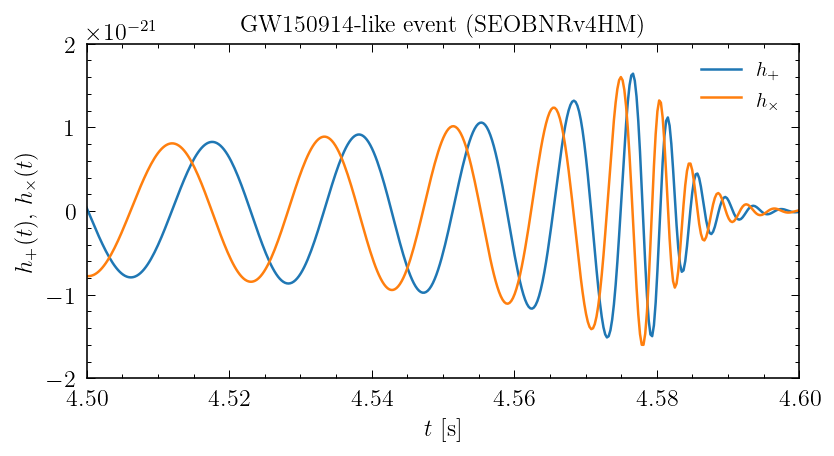

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(time_array, hp.data.data, color='C0', label=r"$h_{+}$")
ax.plot(time_array, hc.data.data, color='C1', label=r"$h_{\times}$")

ax.legend()
ax.set_xlim(4.5, 4.6)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$, $h_{\times}(t)$")
ax.set_title("GW150914-like event (SEOBNRv4HM)")

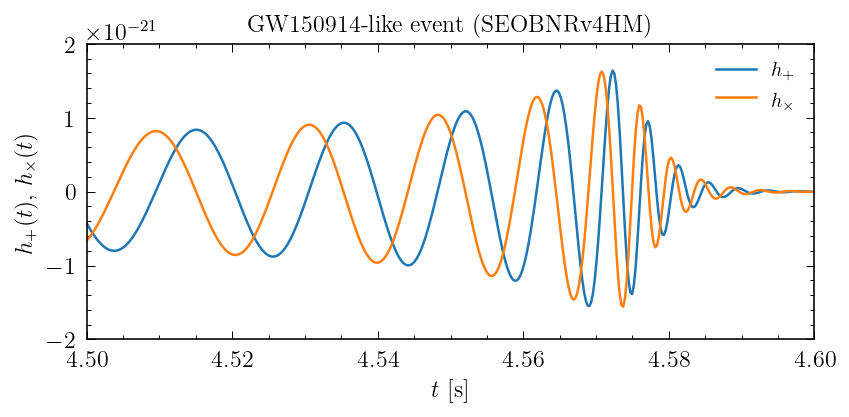

In [6]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(time_array, hp.data.data, color='C0', label=r"$h_{+}$")
ax.plot(time_array, hc.data.data, color='C1', label=r"$h_{\times}$")

ax.legend()
ax.set_xlim(4.5, 4.6)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$, $h_{\times}(t)$")
ax.set_title("GW150914-like event (SEOBNRv4HM)")

plt.tight_layout()
plt.savefig("tmp.pdf")

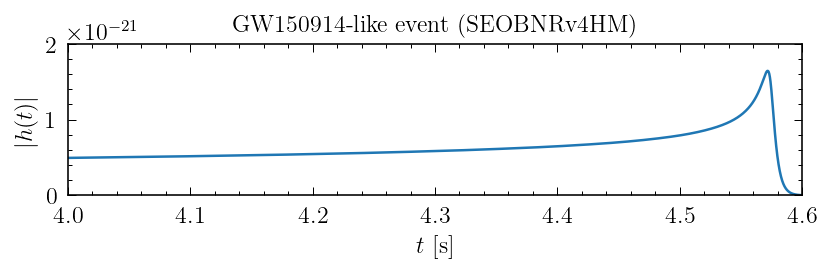

In [7]:
fig, ax = plt.subplots(figsize=(6, 2))

ax.plot(time_array, ampoft, color='C0')

ax.set_xlim(4, 4.6)
ax.set_ylim(0, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$|h(t)|$")
ax.set_title("GW150914-like event (SEOBNRv4HM)")

plt.tight_layout()

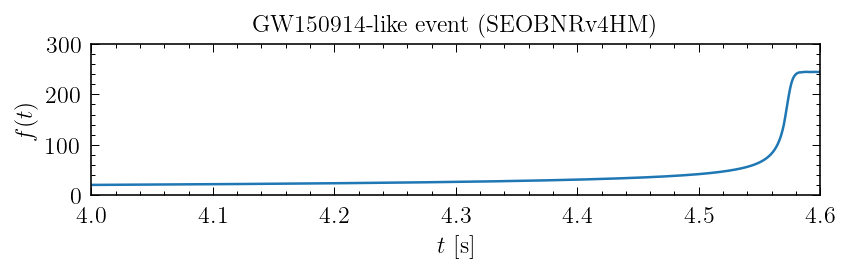

In [8]:
fig, ax = plt.subplots(figsize=(6, 2))

ax.plot(time_array, Foft, color='C0')

ax.set_xlim(4, 4.6)
ax.set_ylim(0, 300)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$f(t)$")
ax.set_title("GW150914-like event (SEOBNRv4HM)")

plt.tight_layout()

A plot showing $f(t)$ and $|h(t)|$ with twin-axes.

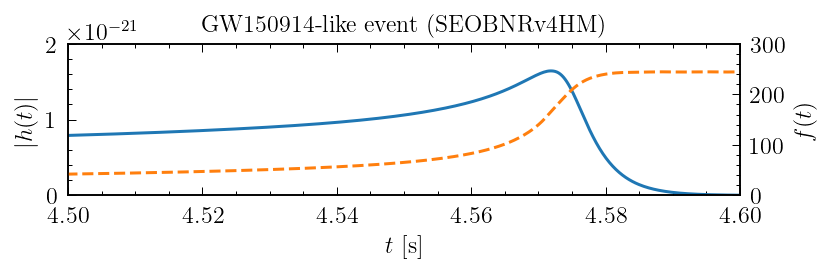

In [9]:
fig, ax1 = plt.subplots(figsize=(6, 2))

ax1.plot(time_array, ampoft, color='C0', lw=3/2.)

ax1.set_xlim(4.5, 4.6)
ax1.set_ylim(0, + 2e-21)

ax1.set_xlabel(r"$t$ [s]")
ax1.set_ylabel(r"$|h(t)|$")
ax1.set_title("GW150914-like event (SEOBNRv4HM)")

ax2 = ax1.twinx()
ax2.set_ylim(0, 300)
ax2.set_ylabel(r"$f(t)$")
ax2.plot(time_array, Foft, ls="--", color='C1', label=r"$h_{+}$", lw=3/2.)

plt.tight_layout()

## Wrap in a function

In [ ]:
def make_waveform(m_1, m_2, alpha_NGR=0, p_NGR=0, d_omega220=0, d_tau220=0, d_omega210=0, d_tau210=0):

    # ----------------------------------
    # Obs.: the default is a GR waveform
    # ----------------------------------
    
    # ------------------------------------
    # Step 1: Define the binary parameters
    # ------------------------------------
    nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary

    m1 = m_1*lal.MSUN_SI
    m2 = m_2*lal.MSUN_SI

    phi_c = 0.
    f_start22 = 10. #Frequency of the 22 mode at which the signal starts
    distance = 500e6*lal.PC_SI

    z = 0.01

    spin1_z = 0.
    spin2_z =  0.

    inclination = 153.95
    deltaT = 1./4096. * 1
    # deltaT = 1./16384.

    # Only GR for now
    domega220, dtau220 = d_omega220, d_tau220
    domega210, dtau210 = d_omega210, d_tau210
    domega330, dtau330 = 0., 0.
    domega440, dtau440 = 0., 0.
    domega550, dtau550 = 0., 0.
    alphaNGR = alpha_NGR
    pNGR = p_NGR
    
    # -------------------------
    # Step 2: Generate waveform
    # -------------------------
    paramdict = lal.CreateDict()

    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
    lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
    lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
    lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
    lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)
    lalsimulation.SimInspiralWaveformParamsInsertAlphaNGR(paramdict, alphaNGR)
    lalsimulation.SimInspiralWaveformParamsInsertPNGR(paramdict, pNGR)

    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0, 0, spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., 
                                                        deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM_PA)

    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    ampoft = np.abs(h)
    phioft = np.unwrap(np.angle(h))
    Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)
    
    return time_array, hp, hc, ampoft, phioft, Foft

In [4]:
t_GR,  hp_GR,  hc_GR,  _, _, _ = make_waveform(39, 31)
t_CS,  hp_CS,  hc_CS,  _, _, _ = make_waveform(39, 31, 50, 4, 3.1964, 6.3619)
t_CS2, hp_CS2, hc_CS2, _, _, _ = make_waveform(39, 31, 50, 4, 3.1964, 6.3619, 41.1987, 794.662)

Text(0.5, 1.0, 'GW150914-like event')

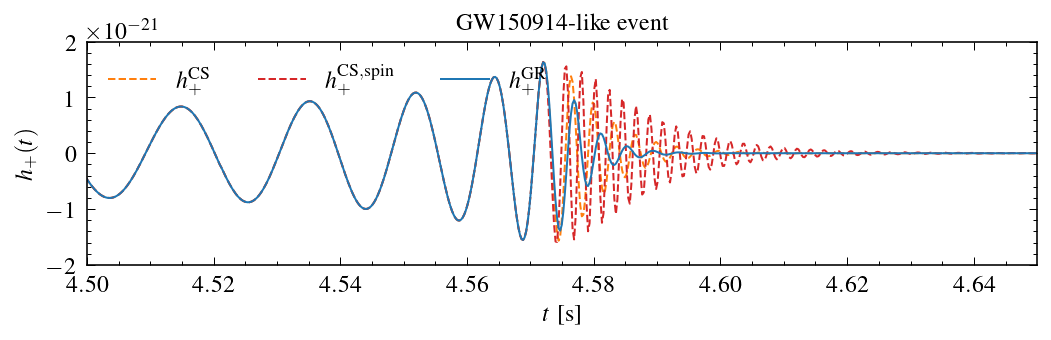

In [5]:
fig, ax = plt.subplots(figsize=(8, 2))

ax.plot(t_CS,  hp_CS.data.data,  ls="--", color='C1', label=r"$h_{+}^{\rm CS}$")
ax.plot(t_CS2, hp_CS2.data.data, ls="--", color='C3', label=r"$h_{+}^{\rm CS, spin}$")
ax.plot(t_GR,  hp_GR.data.data,  ls="-",  color='C0', label=r"$h_{+}^{\rm GR}$")

ax.legend(fontsize=12, loc='upper left', ncol=3)
ax.set_xlim(4.50, 4.65)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_title("GW150914-like event")

Text(0.5, 1.0, 'GW150914-like event')

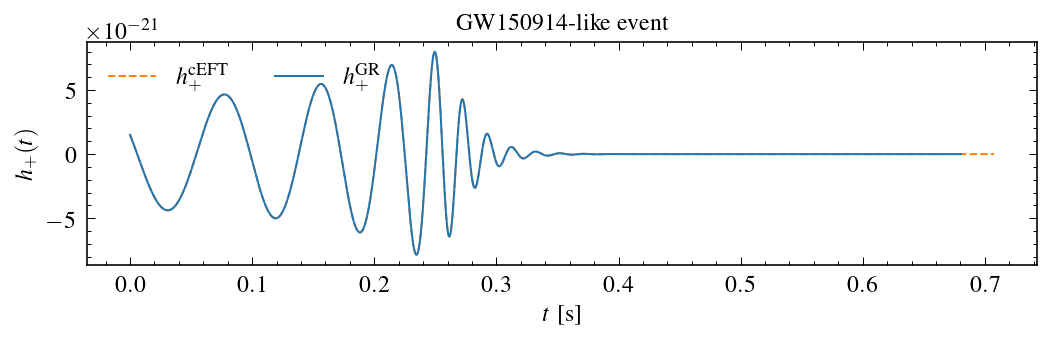

In [46]:
m1 = 170
m2 = 170

t_cEFT, hp_cEFT, hc_cEFT, _, _, _ = make_waveform(m1, m2, 120, 4, -0.5813, 1.3232)
t_GR, hp_GR, hc_GR, _, _, _ = make_waveform(m1, m2, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 2))

ax.plot(t_cEFT, hp_cEFT.data.data,  ls="--", color='C1', label=r"$h_{+}^{\rm cEFT}$")
ax.plot(t_GR, hp_GR.data.data,  ls="-",  color='C0', label=r"$h_{+}^{\rm GR}$")

ax.legend(fontsize=12, loc='upper left', ncol=3)
# ax.set_xlim(4.50, 4.8)
# ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_title("GW150914-like event")

In [13]:
t_GB,  hp_GB,  hc_GB,  _, _, _ = make_waveform(39, 31, 200, 4, 0.0107, 0.0044)
t_GB2, hp_GB2, hc_GB2, _, _, _ = make_waveform(39, 31, 200, 4, 0.0107, 0.0044, 0.2480, 1.1014)

Text(0.5, 1.0, 'GW150914-like event')

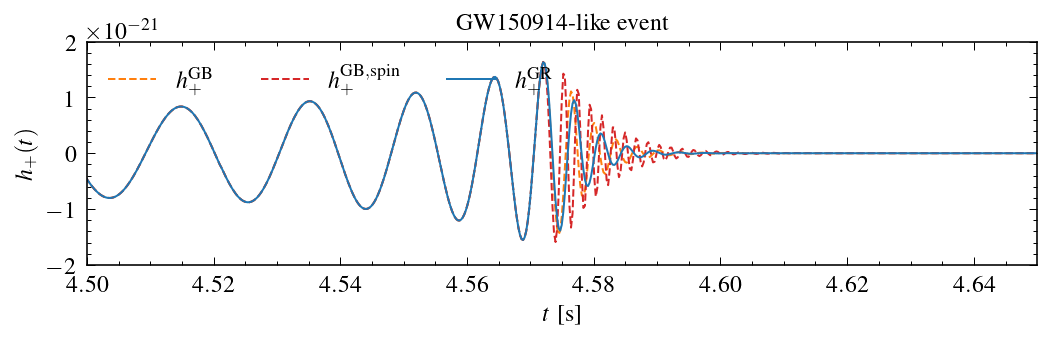

In [14]:
fig, ax = plt.subplots(figsize=(8, 2))

ax.plot(t_GB,  hp_GB.data.data,  ls="--", color='C1', label=r"$h_{+}^{\rm GB}$")
ax.plot(t_GB2, hp_GB2.data.data, ls="--", color='C3', label=r"$h_{+}^{\rm GB, spin}$")
ax.plot(t_GR,  hp_GR.data.data,  ls="-",  color='C0', label=r"$h_{+}^{\rm GR}$")

ax.legend(fontsize=12, loc='upper left', ncol=3)
ax.set_xlim(4.50, 4.65)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_title("GW150914-like event")

Text(0.5, 1.0, 'GW150914-like event')

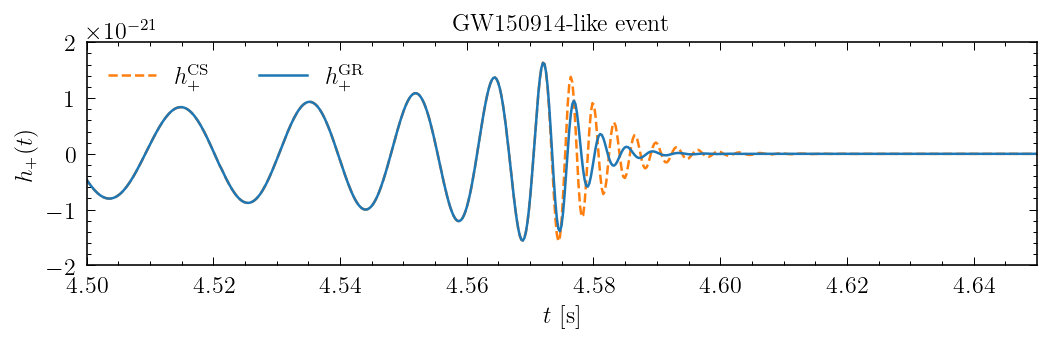

In [91]:
fig, ax = plt.subplots(figsize=(8, 2))

ax.plot(t_CS, hp_CS.data.data, ls="--", color='C1', label=r"$h_{+}^{\rm CS}$")
ax.plot(t_GR, hp_GR.data.data, ls="-",  color='C0', label=r"$h_{+}^{\rm GR}$")

ax.legend(fontsize=12, loc='upper left', ncol=2)
ax.set_xlim(4.50, 4.65)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_title("GW150914-like event")

Text(0.5, 1.0, 'GW150914-like event (SEOBNRv4HM)')

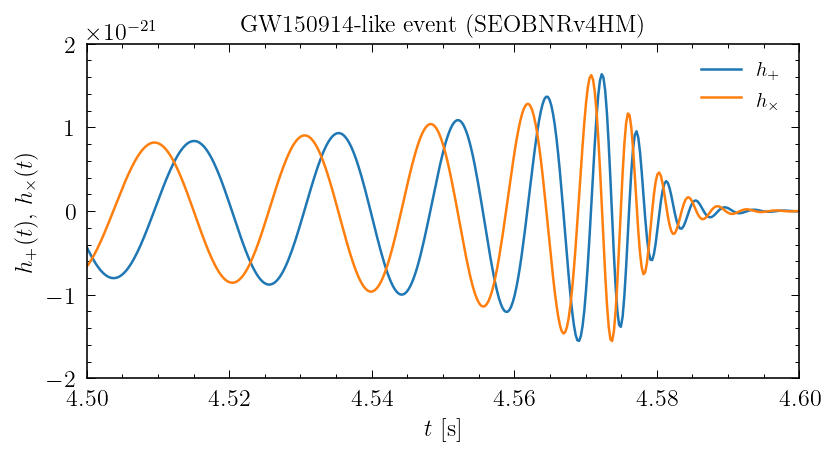

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(t, hp.data.data, color='C0', label=r"$h_{+}$")
ax.plot(t, hc.data.data, color='C1', label=r"$h_{\times}$")

ax.legend()
ax.set_xlim(4.5, 4.6)
ax.set_ylim(- 2e-21, + 2e-21)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$h_{+}(t)$, $h_{\times}(t)$")
ax.set_title("GW150914-like event (SEOBNRv4HM)")

## Example waveform for paper

In [7]:
m1 = 31
m2 = 39

In [8]:
t_cEFT, hp_cEFT, hc_cEFT, ampoft_cEFT, phioft_cEFT, Foft_cEFT = make_waveform(m1, m2, 65, 4, -0.5813, 2.6469)
t_GR, hp_GR, hc_GR, ampoft_GR, phioft_GR, Foft_GR = make_waveform(m1, m2, 0, 0, 0, 0)

In [9]:
print(t_GR.min(), t_GR.max())

0.0 4.70458984375


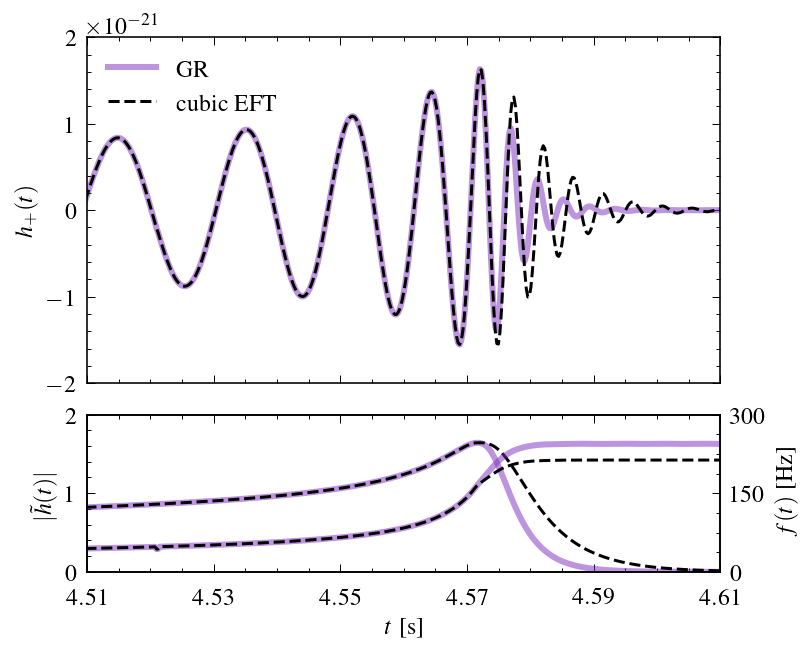

In [32]:
x = [['A', 'A'],
     ['A', 'A'],
     ['B', 'B']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5.5, 4.5), 
                             gridspec_kw={'left':0.1, 'hspace': 0.2, 'wspace': 0.6, 'bottom':0.125, 'right':0.9})

for k in ('A', 'B'):
    tmin = 4.51
    tmax = 4.61
    dt = 0.02
    axes[k].set_xlim(tmin, tmax)
    axes[k].xaxis.set_ticks(np.arange(tmin, tmax, dt))
    
axes['A'].plot(t_GR,   hp_GR.data.data,   ls='-',  lw=3, c='#7b2cbf', alpha=0.5, label='GR')
axes['A'].plot(t_cEFT, hp_cEFT.data.data, ls='--', lw=1.5, c='k', label='cubic EFT')
axes['A'].set_xticklabels([]);
axes['A'].set_ylabel(r'$h_{+}(t)$')
axes['A'].set_ylim(-2e-21, 2e-21)
axes['A'].legend(ncol=1, loc='upper left', fontsize=12)

axes['B'].set_xlabel(r'$t$ [s]')
axes['B'].set_ylabel(r'$|\tilde{h}(t)|$')
axes['B'].plot(t_GR, ampoft_GR * 1e21, ls='-', lw=3, c='#7b2cbf', alpha=0.5)
axes['B'].plot(t_cEFT, ampoft_cEFT * 1e21, ls='--', lw=1.5, c='k')
axes['B'].set_ylim(0, 2)
axes['B'].yaxis.set_ticks(np.arange(0, 3, 1))
axes['B'].xaxis.set_tick_params(pad=8)
    
axC = axes['B'].twinx()
axC.set_ylim(0, 300)
axC.yaxis.set_ticks(np.arange(0, 300 + 150, 150))
axC.set_ylabel(r"$f(t)$ [Hz]")
axC.plot(t_GR, Foft_GR, ls='-', lw=3, c='#7b2cbf', alpha=0.5)
axC.plot(t_cEFT, Foft_cEFT, ls='--', lw=1.5, c='k')

# axes['C'].set_xlabel(r'$\ell_{\rm GB}$ [km]');

plt.savefig("../figs/example_waveform_cubicEFT.pdf")

In [26]:
np.arange(4.50, 4.65, 0.05)

array([4.5 , 4.55, 4.6 , 4.65])

(0.0, 300.0)

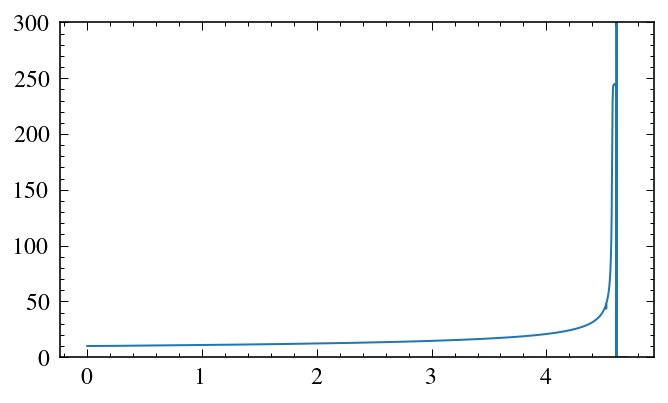

In [63]:
plt.plot(t_GR, Foft_GR, ls='-', c='C0')
plt.ylim(0, 300)

In [85]:
np.arange(0, 300, 100)

array([  0, 100, 200])